In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
# get data
data = pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv')

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# split  input and out variable

X = data.drop('Outcome', axis=1)
y = data['Outcome']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
clf1 = LogisticRegression()

In [ ]:
clf1.fit(X_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
clf = LogisticRegression(max_iter=1000)

In [ ]:
clf.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# predicting y for test data
y_pred = clf.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [ ]:
# predicting probabilities of y for test data
y_scores = clf.predict_proba(X_test)

In [ ]:
y_scores

array([[0.95045829, 0.04954171],
       [0.82538272, 0.17461728],
       [0.90634538, 0.09365462],
       [0.74484372, 0.25515628],
       [0.36440374, 0.63559626],
       [0.88328837, 0.11671163],
       [0.93432503, 0.06567497],
       [0.57801189, 0.42198811],
       [0.95135356, 0.04864644],
       [0.42431946, 0.57568054],
       [0.66133055, 0.33866945],
       [0.58708707, 0.41291293],
       [0.30145325, 0.69854675],
       [0.80032682, 0.19967318],
       [0.97999098, 0.02000902],
       [0.17535078, 0.82464922],
       [0.13338861, 0.86661139],
       [0.96898529, 0.03101471],
       [0.74491997, 0.25508003],
       [0.10507504, 0.89492496],
       [0.04756872, 0.95243128],
       [0.16525616, 0.83474384],
       [0.88258724, 0.11741276],
       [0.5531924 , 0.4468076 ],
       [0.91076729, 0.08923271],
       [0.93119255, 0.06880745],
       [0.3488393 , 0.6511607 ],
       [0.58799378, 0.41200622],
       [0.82134396, 0.17865604],
       [0.71309737, 0.28690263],
       [0.

In [ ]:
y_scores.shape

(154, 2)

In [ ]:
y_pred.shape

(154,)

### Concatenate y_pred and y_score, convert to df, and compare

In [ ]:
# Concatenate the arrays using NumPy
concatenated_array = np.concatenate((y_pred[:, np.newaxis], y_scores), axis=1)

In [ ]:
concatenated_array[0:2]

array([[0.        , 0.95045829, 0.04954171],
       [0.        , 0.82538272, 0.17461728]])

In [ ]:
# Create a DataFrame with specified column names
column_names = ['classified', '0pbty', '1pbty']
df = pd.DataFrame(concatenated_array, columns=column_names)

In [ ]:
df.head(10)

,classified,0pbty,1pbty
0,0.0,0.950458,0.049542
1,0.0,0.825383,0.174617
2,0.0,0.906345,0.093655
3,0.0,0.744844,0.255156
4,1.0,0.364404,0.635596
5,0.0,0.883288,0.116712
6,0.0,0.934325,0.065675
7,0.0,0.578012,0.421988
8,0.0,0.951354,0.048646
9,1.0,0.424319,0.575681


In [ ]:
# changing threshold and predicting
print('prediction with threshold 0.9 :')

# here we say that only when the pbty is greater/equal to 0.9, the target variable can belong to class 1
y_pred_new_threshold = (clf.predict_proba(X_test)[:, 1] >= 0.9).astype(int)
print(y_pred_new_threshold)

prediction with threshold 0.9 :
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]


In [ ]:
# checking the accuracy score
from sklearn.metrics import accuracy_score
print("Accuracy of Logistic Regression",accuracy_score(y_test,y_pred))

Accuracy of Logistic Regression 0.7662337662337663


In [ ]:
# Get confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)


array([[96, 13],
       [23, 22]])

In [ ]:
# Get df for confusion matrix
print("Logistic Regression Confusion Matrix\n")
pd.DataFrame(confusion_matrix(y_test,y_pred),columns=list(range(0,2)))


Logistic Regression Confusion Matrix



,0,1
0,96,13
1,23,22


In [ ]:
from sklearn.metrics import recall_score,precision_score,f1_score

print("Precision - ",precision_score(y_test,y_pred))
print("Recall - ",recall_score(y_test,y_pred))
print("F1 score - ",f1_score(y_test,y_pred))


Precision -  0.6285714285714286
Recall -  0.4888888888888889
F1 score -  0.5499999999999999


In [ ]:
# get precision score for all the classes
precision_score(y_test,y_pred,average=None)

array([0.80672269, 0.62857143])

In [ ]:
# ROC AUC

# note here we give the predicted probabilities
y_scores1 = clf.predict_proba(X_test)[:,1]



from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores1)

In [ ]:
thresholds

array([1.99355988e+00, 9.93559880e-01, 9.52622236e-01, 9.52431281e-01,
       8.24649217e-01, 7.68785139e-01, 7.62084165e-01, 6.83892849e-01,
       6.75401963e-01, 6.74194852e-01, 6.51160703e-01, 6.50852686e-01,
       6.35596265e-01, 5.86285586e-01, 5.75680539e-01, 5.69730880e-01,
       5.25254827e-01, 4.70273418e-01, 4.61218138e-01, 4.50440904e-01,
       4.38942687e-01, 4.38655977e-01, 4.22094906e-01, 4.19918162e-01,
       4.12912934e-01, 4.12006218e-01, 4.04764937e-01, 3.79702578e-01,
       3.68652975e-01, 3.10181073e-01, 3.08805269e-01, 2.77743854e-01,
       2.71997928e-01, 2.58474746e-01, 2.55156282e-01, 2.47442932e-01,
       2.45508327e-01, 2.36554726e-01, 2.28894872e-01, 1.81848208e-01,
       1.78656037e-01, 1.74617283e-01, 1.73313406e-01, 1.46364532e-01,
       1.40805420e-01, 1.16711628e-01, 1.14930426e-01, 1.10000756e-01,
       1.06701251e-01, 8.92327115e-02, 8.67501626e-02, 2.00090231e-02,
       1.93062126e-02, 1.60776532e-03])

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# defining fn for plotting roc curve

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.figure(figsize=(9,6));

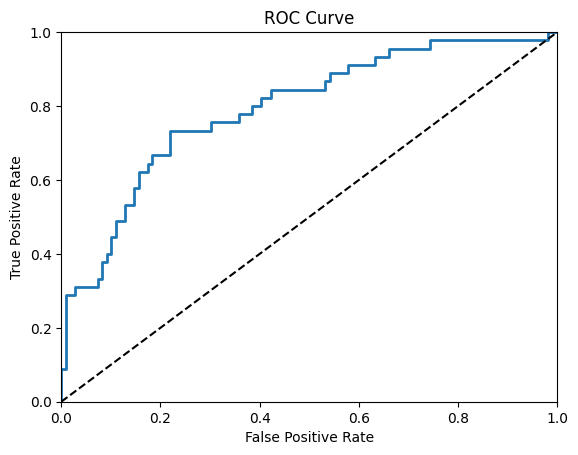

<Figure size 900x600 with 0 Axes>

In [ ]:
plot_roc_curve(fpr, tpr)
plt.show();

In [ ]:
# getting auc roc value
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_scores1)
print(auc)


0.7936799184505606
